# WATERMARKS
In this notebook, you are going to learn how to add watermarks to images. A watermark is typically a semi-transparent logo or message added to an image to convey some additional information without detracting from the image. We will demonstrate how to create watermarks by first showing how to add a logo to an image. Then we will take it a step further and show you how to blend a logo with an image that has a much more subdued effect. 

 
We will be working with the following logos and images to create watermarks.

## $~~~~~~~~~~~~~~~~~~~~$Logos$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$Images 
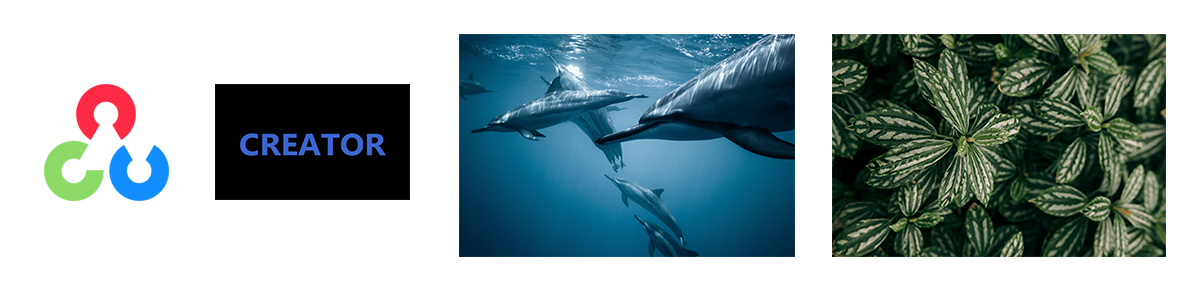

## Import Libraries


In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

plt.rcParams['image.cmap'] = 'gray'

## Display images

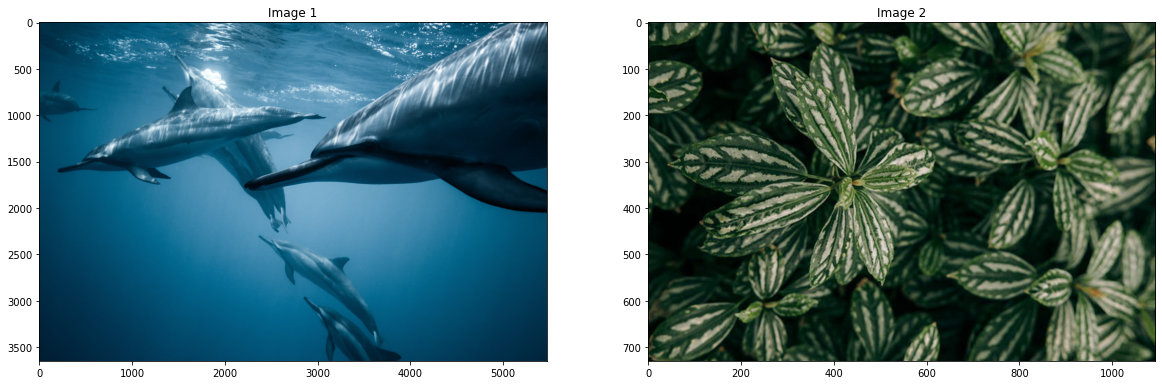

In [27]:
# Load Image
img1 = cv2.imread('dolphins.jpg')
img2 = cv2.imread('leaves.jpg')

plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(img1[:,:,::-1]); plt.title('Image 1');
plt.subplot(122); plt.imshow(img2[:,:,::-1]); plt.title('Image 2');


## Too Large?
Notice that image-1 is quite a bit larger than image-2. Let's resize image-1 to make the sizes equal. In our case reducing image-1 by a factor of 5 does the job.
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>


[**`resize()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

In [13]:
# Resize 
img1 = cv2.resize(img1, None, fx= 0.2, fy= 0.2, interpolation= cv2.INTER_LINEAR)

print("Image 1 size after resizing : ", img1.shape)
print("Image 2 size : ", img2.shape)

# retrieve the image shape
img_h, img_w, _ = img1.shape


Image 1 size after resizing :  (730, 1094, 3)
Image 2 size :  (730, 1094, 3)


## Display actual logos in browser

###  <font style="color:rgb(8,133,37)">Note the image formats and actual sizes</font>

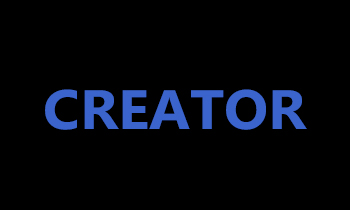

In [14]:
# Display OpenCV Logo
Image(filename='creator_logo.jpg')

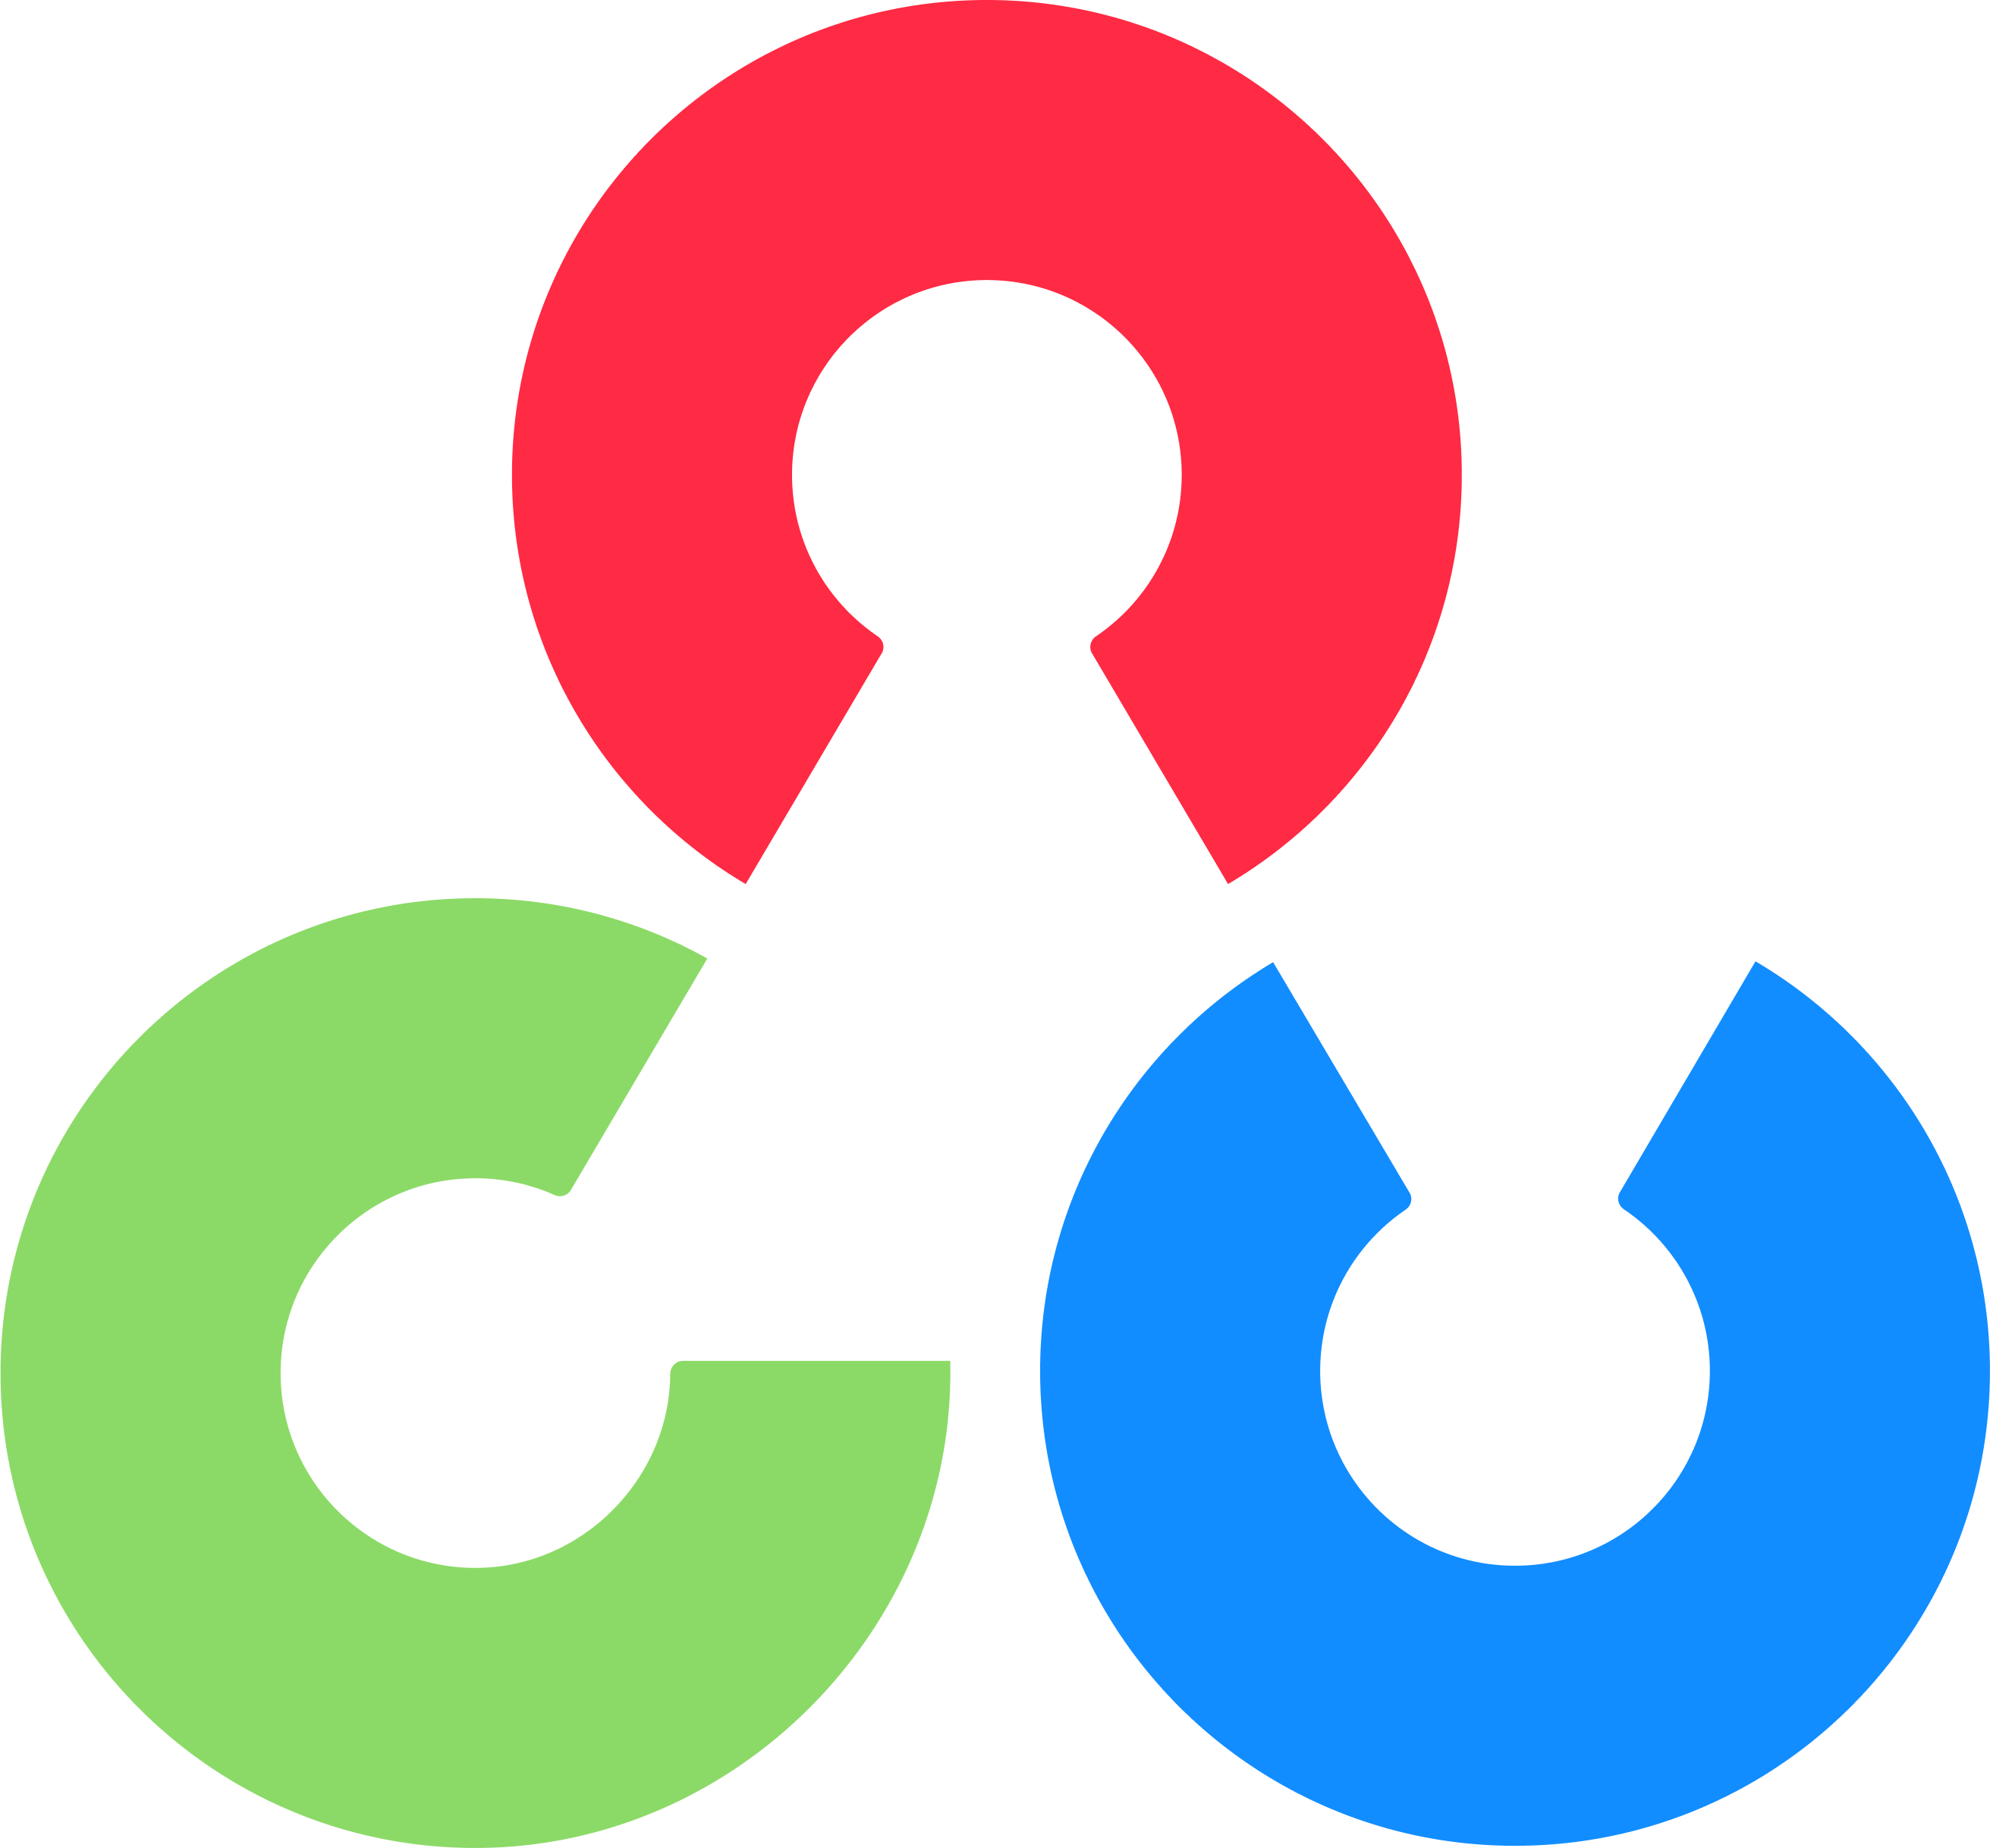

In [15]:
# Display OpenCV Logo
Image(filename='OpenCV_logo.png')

## Read logos and display as numpy arrays

OpenCV logo size :  (2436, 2623, 3)
Creator logo size :  (210, 350, 3)


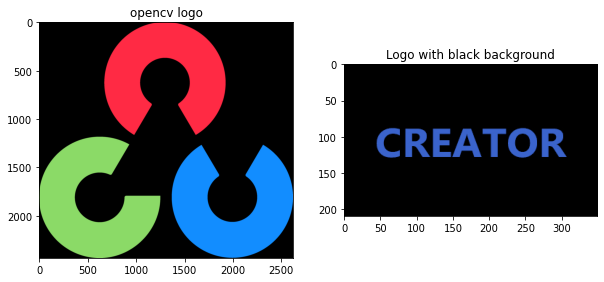

In [16]:
# Load logos
opencv_logo = cv2.imread('opencv_logo.png')
creator_logo = cv2.imread('creator_logo.jpg')

print("OpenCV logo size : ",opencv_logo.shape)
print("Creator logo size : ", creator_logo.shape)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(opencv_logo[:,:,::-1]);plt.title('opencv logo');
plt.subplot(122);plt.imshow(creator_logo[:,:,::-1]);plt.title('Logo with black background');


## Reduce the size of the OpenCV logo to be more consistent with the other images.

OpenCV Logo shape after resizing :  (244, 262, 3)
Logo with black background :  (210, 350, 3)


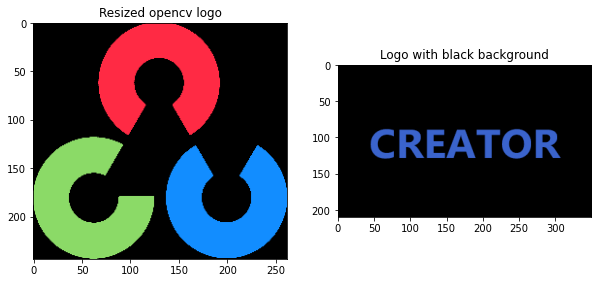

In [17]:
# Resize opencv logo
opencv_logo = cv2.resize(opencv_logo, None, fx= 0.1, fy= 0.1, interpolation= cv2.INTER_LINEAR )

# Check logo shapes
print("OpenCV Logo shape after resizing : ", opencv_logo.shape)
print("Logo with black background : ", creator_logo.shape)

# get logo shapes
logo_h1, logo_w1, _ = opencv_logo.shape
logo_h2, logo_w2, _ = creator_logo.shape

# Display
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(opencv_logo[:,:,::-1]);plt.title('Resized opencv logo');
plt.subplot(122);plt.imshow(creator_logo[:,:,::-1]);plt.title('Logo with black background');

<hr style="border:2px solid gray"> </hr>

# Preliminary (adding logos to images) 
This method works well with logos with both white and black backgrounds. Except this does not provide transparency effect. Here, we are going to learn how to use `bitwise_and()`, `bitwise_not()`, and `add()` function to carry out the operation.


## Goal

<img src = "Watermark_method1.png">
                                  
## Workflow
 - Extract the foreground and background masks of the logo
 - Find ROI
 - Perform `bitwise_and()` on foreground mask and ROI
 - Perform `bitwise_and()` on background mak and the original logo 
 - Use `add()` to combine the logo foreground on the ROI background
 - Insert the combined watermark patch in the image

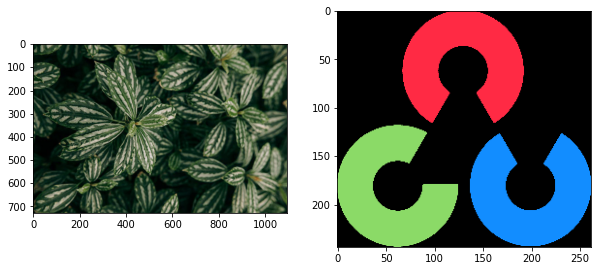

In [18]:
# retrieve the image and logo shapes.
img_h, img_w, _ = img2.shape
logo_h, logo_w, _ = opencv_logo.shape

# Make a copy of the logo and image.
logo = opencv_logo.copy()
img = img2.copy()

# Display the image and logo separatley.
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img[:,:,::-1]);
plt.subplot(122); plt.imshow(logo[:,:,::-1]);

## Determine the Region of Interest (ROI) in the image

### <font style="color:rgb(8,133,37)">Place the logo at the center of the image</font>

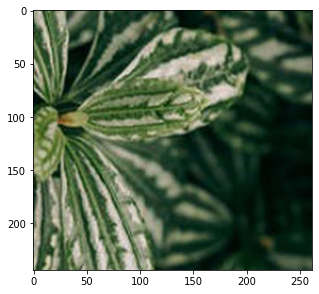

In [19]:
# Cx and Cy are the coordinates of the center of the image.
cx = int(img_w/2)
cy = int(img_h/2)

# tlc : top left corner
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

# Get region of interest
roi = img[tlc_y:brc_y, tlc_x:brc_x]

# display
plt.figure(figsize=(5,5))
plt.imshow(roi[:,:,::-1])

## Create Logo Masks
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>


[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`bitwise_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)


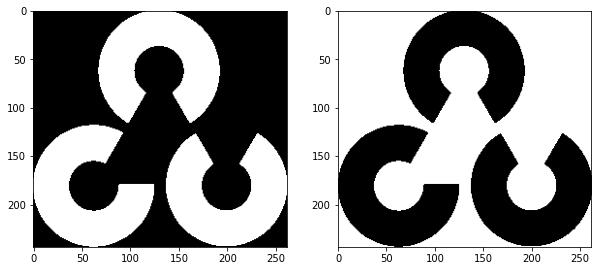

In [20]:
# Convert logo to gray scale
opencv_gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)

# Apply thresholding to extract mask
threshold = 50
ret,mask = cv2.threshold(opencv_gray,threshold,255,cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(mask);
plt.subplot(122); plt.imshow(mask_inv);


<hr style="border:2px solid gray"> </hr>

## Set up ROI background and Logo foreground
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.bitwise_and( src1, src2[, dst[, mask]] ) 
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and type as the input array(s)

The function has **1 optional argument**:
1. `mask`: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>


[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

<hr style="border:2px solid gray"> </hr>

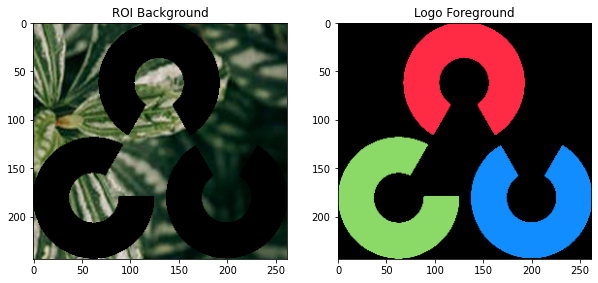

In [28]:
bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
fg = cv2.bitwise_and(logo, logo, mask = mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(bg[:,:,::-1]);plt.title('ROI Background');
plt.subplot(122); plt.imshow(fg[:,:,::-1]);plt.title('Logo Foreground');


<hr style="border:2px solid gray"> </hr>

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.add(src1, src2[, dst[, mask[, dtype]]])
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and number of channels as the input array(s); the depth is defined by dtype or src1/src2.

The function has **2 optional argument**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array (see the discussion below).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)

<hr style="border:2px solid gray"> </hr>

True

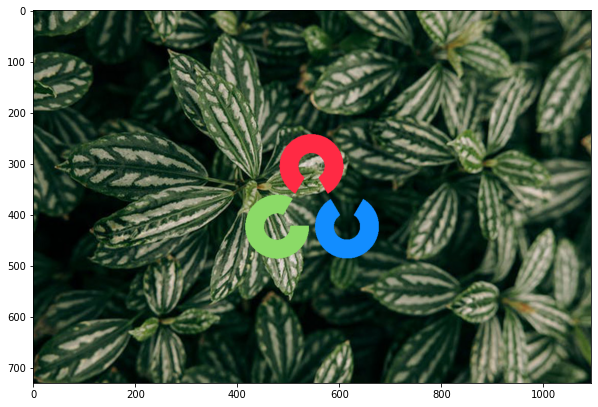

In [22]:
# Add the foreground and background
patch = cv2.add(fg,bg)

# Insert the patch in the image
img[tlc_y:brc_y, tlc_x:brc_x] = patch

# Display
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])
cv2.imwrite("Watermark_method1.png", img)

<hr style="border:2px solid gray"> </hr>

# Watermarking (adding a semi-transparent logo)
Now that we know how to make straight forward watermark, let's take a look at another mathod which provides transparency effect.

## Goal

<img src = "Watermark_method2_img1.png">
<img src = "Watermark_method2_img2.png">

## Workflow
1. Resize the image to a suitable size if required
2. Check height and width of logo
3. Get ROI from image according to height and width of the logo
4. Perform `addWeighted()` operation

In [ ]:
# Check dimension of images
print('Image 1 Height x Width : ', img1.shape[0] , 'x', img1.shape[1])
print('Image 2 Height x Width : ', img2.shape[0] , 'x', img2.shape[1])

### Get ROI of images
Well the ROI or region of interest is the area on which we are going to superimpose the logo. We are going to place the logos in the center of left half and right half of first images. Following illustration provides a rough idea. Once we calculate the coordinates for first image, we don't need to do it for the second image as the dimensions are exact.<br>
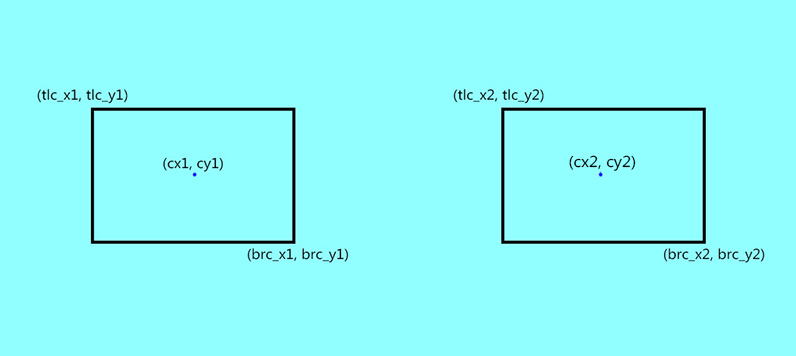
<br>

In [ ]:
# Cx1 and Cy1 are centre of the left half
cx1 = int(img_w/4)
cy1 = int(img_h/2)

# tlc : top left corner
tlc_x1 = int(cx1 - logo_w1/2)
tlc_y1 = int(cy1 - logo_h1/2)

# brc : bottom right corner
brc_x1 = int(cx1 + logo_w1/2)
brc_y1 = int(cy1 + logo_h1/2)

# Cx2 and Cy2 are centre of the right half
cx2 = int((3/4)*img_w)
cy2 = int(img_h/2)

# tlc : top left corner
tlc_x2 = int(cx2 - logo_w2/2)
tlc_y2 = int(cy2 - logo_h2/2)

# brc : bottom right corner
brc_x2 = int(cx2 + logo_w2/2)
brc_y2 = int(cy2 + logo_h2/2)

# Get region of interest, Image 1
roi1 = img1[tlc_y1:brc_y1, tlc_x1:brc_x1]
roi2 = img1[tlc_y2:brc_y2, tlc_x2:brc_x2]

# Get region of interest, Image 2
roi3 = img2[tlc_y1:brc_y1, tlc_x1:brc_x1]
roi4 = img2[tlc_y2:brc_y2, tlc_x2:brc_x2]

# display
plt.figure(figsize=(15,15))
plt.subplot(141); plt.imshow(roi1[:,:,::-1]); plt.title('ROI left half');
plt.subplot(142); plt.imshow(roi2[:,:,::-1]); plt.title('ROI right half');
plt.subplot(143); plt.imshow(roi3[:,:,::-1]); plt.title('ROI left half');
plt.subplot(144); plt.imshow(roi4[:,:,::-1]); plt.title('ROI right half');

<hr style="border:2px solid gray"> </hr>

## Superimpose logos with image ROI
The `addWeighted()` function allows you to blend two images.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]	)
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **5 required arguments**:

1. `src`: first input array.
2. `alpha`: weight of the first array elements.
3. `src2`:	second input array.
4. `beta`: weight of the second array elements.
5. `gamma`: scalar added to each sum.

The function has **1 optional argument**:
1. `dtype` : optional depth of the output array; when both input arrays have the same depth, dtype can be set to -1, which will be equivalent to `src1.depth()`.



<hr style="border:2px solid gray"> </hr>

## Create watermark patches

In [ ]:
# Blend ROi and Logos
beta = .6
watermark_patch_1 = cv2.addWeighted(roi1, 1, opencv_logo,  beta, 0)
watermark_patch_2 = cv2.addWeighted(roi2, 1, creator_logo, beta, 0)
watermark_patch_3 = cv2.addWeighted(roi3, 1, opencv_logo,  beta, 0)
watermark_patch_4 = cv2.addWeighted(roi4, 1, creator_logo, beta, 0)

# display
plt.figure(figsize=(15,15))
plt.subplot(141); plt.imshow(watermark_patch_1[:,:,::-1]);
plt.subplot(142); plt.imshow(watermark_patch_2[:,:,::-1]);
plt.subplot(143); plt.imshow(watermark_patch_3[:,:,::-1]);
plt.subplot(144); plt.imshow(watermark_patch_4[:,:,::-1]);


## Replace image patch with Watermark patch


In [ ]:
# Insert the watermarked patch in the image
img1[tlc_y1:brc_y1, tlc_x1:brc_x1] = watermark_patch_1
img1[tlc_y2:brc_y2, tlc_x2:brc_x2] = watermark_patch_2
img2[tlc_y1:brc_y1, tlc_x1:brc_x1] = watermark_patch_3
img2[tlc_y2:brc_y2, tlc_x2:brc_x2] = watermark_patch_4

# display
plt.figure(figsize=(15,15))
plt.subplot(121);plt.imshow(img1[:,:,::-1]);
plt.subplot(122);plt.imshow(img2[:,:,::-1]);

# write to disk
cv2.imwrite("Watermark_method2_img1.png", img1)
cv2.imwrite("Watermark_method2_img2.png", img2)

## Conclusion
So we have seen different methods to apply watermark to images. Both methods have their advantages and disadvantages. Finally, it's really upto the users which function to use.